In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/police.csv")
df['is_arrested'] = df.is_arrested.astype('bool')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Amostragem da coluna Violation

Como a claasse "violation" se encontra desbalanceada, vamos fazer um **undersampling** coletando uma amostra de cada classe baseada na classe minoritária.

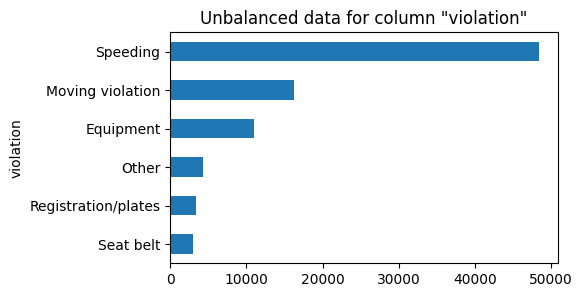

violation
Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: count, dtype: int64

In [3]:
counts = df.violation.value_counts()

plt.figure(figsize=(5, 3))
counts.sort_values(ascending=True).plot.barh(title='Unbalanced data for column "violation"')
plt.show()
counts

In [4]:
min_value = counts.min()

df_resampled = []

for _class in counts.index:
    df_resampled.append(df[df.violation == _class].sample(min_value))

df_resampled = pd.concat(df_resampled)
df_resampled.violation.value_counts()

violation
Speeding               2952
Moving violation       2952
Equipment              2952
Other                  2952
Registration/plates    2952
Seat belt              2952
Name: count, dtype: int64

## Conversão de colunas categóricas para numéricas

In [5]:
# Salvamos as colunas numéricas previamente
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['county_name', 'driver_age_raw', 'driver_age']

In [6]:
# Convertemos colunas pertinentes de numéricas para categóricas
df.select_dtypes(include=['number'])

cols = [
    'driver_race',
    'driver_gender',
    'violation_raw',
    'driver_gender',
    'driver_race',
    'stop_outcome',
    'stop_duration',
    'is_arrested'
]

for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,1,1985.0,20.0,4,8,Speeding,False,NaN,2,0,0,False
1,2005-01-18,08:15,NaN,1,1965.0,40.0,4,8,Speeding,False,NaN,2,0,0,False
2,2005-01-23,23:15,NaN,1,1972.0,33.0,4,8,Speeding,False,NaN,2,0,0,False
3,2005-02-20,17:15,NaN,1,1986.0,19.0,4,1,Other,False,NaN,0,1,2,False
4,2005-03-14,10:00,NaN,0,1984.0,21.0,4,8,Speeding,False,NaN,2,0,0,False


In [7]:
# Obtemos um dataframe numérico usando as colunas numéricas com as transformadas.

df_numeric = df[numeric_cols + cols].drop(columns='county_name').dropna()
df_numeric

,driver_age_raw,driver_age,driver_race,driver_gender,violation_raw,driver_gender,driver_race,stop_outcome,stop_duration,is_arrested
0,1985.0,20.0,4,1,8,1,4,2,0,0
1,1965.0,40.0,4,1,8,1,4,2,0,0
2,1972.0,33.0,4,1,8,1,4,2,0,0
3,1986.0,19.0,4,1,1,1,4,0,2,1
4,1984.0,21.0,4,0,8,0,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...
91736,1986.0,29.0,4,1,8,1,4,5,0,0
91737,1982.0,33.0,4,0,2,0,4,5,0,0
91738,1992.0,23.0,4,1,4,1,4,5,0,0
91739,1993.0,22.0,4,1,8,1,4,2,0,0


## Aplicando PCA para redução de dimensionalidade

Foi aplicado PCA e extraído as 2 componentes principais para os 10 atributos

In [8]:
pca = PCA(n_components=2)  

pca_values = pca.fit_transform(df_numeric)
df = pd.DataFrame(pca_values)
df.columns = df.columns + 1
df.add_prefix("component-")

,component-1,component-2
0,-16.016867,-3.904988
1,12.263923,-3.584813
2,2.365647,-3.696874
3,-17.454350,1.781320
4,-14.606210,-3.918099
...,...,...
86115,-10.450411,0.059345
86116,-4.820879,5.020593
86117,-18.950144,3.247515
86118,-20.350624,-0.221567
